In [1]:
import os
import numpy as np
import pandas as pd 
import math 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

from utils import load_data

Using TensorFlow backend.


In [2]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X).ravel()
    fpr, tpr, _ = roc_curve(y.ravel(), pred_proba)
    auc_rf = auc(fpr, tpr)
    return fpr, tpr, auc_rf

In [3]:
DATA_PATH = os.path.join("data", "model-data2")

In [4]:
_, _, X_test, Y_test = load_data(DATA_PATH, False)

In [5]:
X_test = X_test / 255.0

In [6]:
models = [{"name":"CustomCNN 1", "path":os.path.join("data", "CustomCNN", "CustomCNN-BINARY.model")}, 
          {"name":"CustomCNN-lr-no-reg 1", "path":os.path.join("data", "CustomCNN-lr-no-regularizer", "CustomCNN-BINARY.model")}]
rocs = []

In [7]:
for m in models:
    model = load_model(m["path"])
    roc = get_roc_curve(model, X_test, Y_test)
    rocs.append({"name": m["name"], "plot": roc})

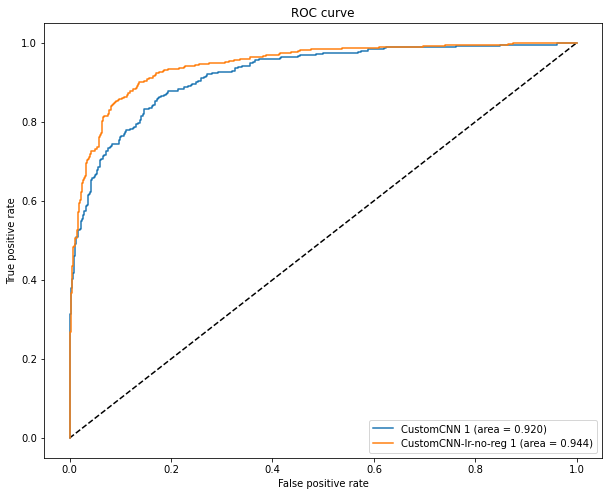

In [8]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

for r in rocs:
    fpr, tpr, auc_rf = r["plot"]
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(r["name"], auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()